In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import**

In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [ ]:
combustivel = pd.read_csv('/content/drive/MyDrive/Inteligência Artificial e Aprendizagem de Máquina/6º PYTHON/ATIVIDADE/ca-2021-02.csv',sep =';')

In [ ]:
combustivel

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,01/07/2021,"5,699",NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,DIESEL S10,01/07/2021,"4,699",NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/07/2021,"5,2",NaN,R$ / litro,IPIRANGA
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,GASOLINA,01/07/2021,"5,49",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472851,NE,BA,JEQUIE,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,28.629.089/0001-79,AVENIDA T LOT JD TROPICAL,53,NaN,TROPICAL,45209-130,ETANOL,31/12/2021,"5,859",NaN,R$ / litro,PETROSERRA
472852,SE,MG,ITUIUTABA,ABC DISTRIBUICAO DE PETROLEO LTDA,13.117.591/0006-38,AVENIDA PROFESSOR JOSE VIEIRA DE MENDONCA,2415,NaN,ALVORADA,38307-113,GASOLINA,31/12/2021,"6,58",NaN,R$ / litro,BRANCA
472853,SE,MG,ITUIUTABA,ABC DISTRIBUICAO DE PETROLEO LTDA,13.117.591/0006-38,AVENIDA PROFESSOR JOSE VIEIRA DE MENDONCA,2415,NaN,ALVORADA,38307-113,ETANOL,31/12/2021,"4,74",NaN,R$ / litro,BRANCA
472854,SE,MG,ITUIUTABA,ABC DISTRIBUICAO DE PETROLEO LTDA,13.117.591/0006-38,AVENIDA PROFESSOR JOSE VIEIRA DE MENDONCA,2415,NaN,ALVORADA,38307-113,DIESEL S10,31/12/2021,"5,448",NaN,R$ / litro,BRANCA


# **Manipulação e limpeza de dados**

In [ ]:
combustivel_limpo = combustivel.drop(columns=['Revenda','Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Valor de Compra','Unidade de Medida'])

In [ ]:
combustivel_limpo

,Regiao - Sigla,Estado - Sigla,Municipio,CNPJ da Revenda,Produto,Data da Coleta,Valor de Venda,Bandeira
0,NE,CE,MARACANAU,05.397.086/0001-51,GASOLINA ADITIVADA,01/07/2021,"5,699",IPIRANGA
1,NE,CE,MARACANAU,05.397.086/0001-51,GASOLINA,01/07/2021,"5,499",IPIRANGA
2,NE,CE,MARACANAU,05.397.086/0001-51,DIESEL S10,01/07/2021,"4,699",IPIRANGA
3,NE,CE,MARACANAU,05.397.086/0001-51,ETANOL,01/07/2021,"5,2",IPIRANGA
4,NE,CE,MARACANAU,03.602.329/0001-10,GASOLINA,01/07/2021,"5,49",VIBRA ENERGIA
...,...,...,...,...,...,...,...,...
472851,NE,BA,JEQUIE,28.629.089/0001-79,ETANOL,31/12/2021,"5,859",PETROSERRA
472852,SE,MG,ITUIUTABA,13.117.591/0006-38,GASOLINA,31/12/2021,"6,58",BRANCA
472853,SE,MG,ITUIUTABA,13.117.591/0006-38,ETANOL,31/12/2021,"4,74",BRANCA
472854,SE,MG,ITUIUTABA,13.117.591/0006-38,DIESEL S10,31/12/2021,"5,448",BRANCA


In [ ]:
combustivel_limpo = combustivel_limpo.rename(columns={'Estado - Sigla': 'UF'})
combustivel_limpo = combustivel_limpo.rename(columns={'Regiao - Sigla': 'Regiao'})
combustivel_limpo = combustivel_limpo.rename(columns={'CNPJ da Revenda':'CNPJ'})
combustivel_limpo = combustivel_limpo.rename(columns={'Valor de Venda': 'Valor'})
combustivel_limpo = combustivel_limpo.rename(columns={'Data da Coleta': 'Coleta'})

In [ ]:
combustivel_limpo

,Regiao,UF,Municipio,CNPJ,Produto,Coleta,Valor,Bandeira
0,NE,CE,MARACANAU,05.397.086/0001-51,GASOLINA ADITIVADA,01/07/2021,"5,699",IPIRANGA
1,NE,CE,MARACANAU,05.397.086/0001-51,GASOLINA,01/07/2021,"5,499",IPIRANGA
2,NE,CE,MARACANAU,05.397.086/0001-51,DIESEL S10,01/07/2021,"4,699",IPIRANGA
3,NE,CE,MARACANAU,05.397.086/0001-51,ETANOL,01/07/2021,"5,2",IPIRANGA
4,NE,CE,MARACANAU,03.602.329/0001-10,GASOLINA,01/07/2021,"5,49",VIBRA ENERGIA
...,...,...,...,...,...,...,...,...
472851,NE,BA,JEQUIE,28.629.089/0001-79,ETANOL,31/12/2021,"5,859",PETROSERRA
472852,SE,MG,ITUIUTABA,13.117.591/0006-38,GASOLINA,31/12/2021,"6,58",BRANCA
472853,SE,MG,ITUIUTABA,13.117.591/0006-38,ETANOL,31/12/2021,"4,74",BRANCA
472854,SE,MG,ITUIUTABA,13.117.591/0006-38,DIESEL S10,31/12/2021,"5,448",BRANCA


In [ ]:
combustivel_limpo['UF']=combustivel_limpo['UF'].astype('string')
combustivel_limpo['Regiao']=combustivel_limpo['Regiao'].astype('string')
combustivel_limpo['CNPJ']=combustivel_limpo['CNPJ'].astype('string')
combustivel_limpo['Municipio']=combustivel_limpo['Municipio'].astype('string')
combustivel_limpo['Produto']=combustivel_limpo['Produto'].astype('string')
combustivel_limpo['Bandeira']=combustivel_limpo['Bandeira'].astype('string')

In [ ]:
combustivel_limpo['Coleta']=combustivel_limpo['Coleta'].astype('datetime64[ns]')

In [ ]:
combustivel_limpo['Valor'] = combustivel_limpo['Valor'].str.replace(',', '.')
combustivel_limpo['Valor']=combustivel_limpo['Valor'].astype('float')

In [ ]:
combustivel_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472856 entries, 0 to 472855
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Regiao     472856 non-null  string        
 1   UF         472856 non-null  string        
 2   Municipio  472856 non-null  string        
 3   CNPJ       472856 non-null  string        
 4   Produto    472856 non-null  string        
 5   Coleta     472856 non-null  datetime64[ns]
 6   Valor      472856 non-null  float64       
 7   Bandeira   472856 non-null  string        
dtypes: datetime64[ns](1), float64(1), string(6)
memory usage: 28.9 MB


In [ ]:
combustivel_limpo

,Regiao,UF,Municipio,CNPJ,Produto,Coleta,Valor,Bandeira
0,NE,CE,MARACANAU,05.397.086/0001-51,GASOLINA ADITIVADA,2021-01-07,5.699,IPIRANGA
1,NE,CE,MARACANAU,05.397.086/0001-51,GASOLINA,2021-01-07,5.499,IPIRANGA
2,NE,CE,MARACANAU,05.397.086/0001-51,DIESEL S10,2021-01-07,4.699,IPIRANGA
3,NE,CE,MARACANAU,05.397.086/0001-51,ETANOL,2021-01-07,5.200,IPIRANGA
4,NE,CE,MARACANAU,03.602.329/0001-10,GASOLINA,2021-01-07,5.490,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...
472851,NE,BA,JEQUIE,28.629.089/0001-79,ETANOL,2021-12-31,5.859,PETROSERRA
472852,SE,MG,ITUIUTABA,13.117.591/0006-38,GASOLINA,2021-12-31,6.580,BRANCA
472853,SE,MG,ITUIUTABA,13.117.591/0006-38,ETANOL,2021-12-31,4.740,BRANCA
472854,SE,MG,ITUIUTABA,13.117.591/0006-38,DIESEL S10,2021-12-31,5.448,BRANCA


# **Exploração de Dados**

In [ ]:
combustivel_limpo.groupby(combustivel_limpo['Produto']).size()

Produto
DIESEL                 53188
DIESEL S10             97069
ETANOL                106029
GASOLINA              119166
GASOLINA ADITIVADA     88861
GNV                     8543
dtype: int64

In [ ]:
combustivel_gasolina = combustivel_limpo[(combustivel_limpo['Produto'] == "GASOLINA")]
combustivel_gasolina

,Regiao,UF,Municipio,CNPJ,Produto,Coleta,Valor,Bandeira
1,NE,CE,MARACANAU,05.397.086/0001-51,GASOLINA,2021-01-07,5.499,IPIRANGA
4,NE,CE,MARACANAU,03.602.329/0001-10,GASOLINA,2021-01-07,5.490,VIBRA ENERGIA
8,NE,CE,MARACANAU,03.020.995/0001-40,GASOLINA,2021-01-07,5.499,RAIZEN
12,NE,CE,MARACANAU,02.349.905/0001-05,GASOLINA,2021-01-07,5.650,BRANCA
15,CO,GO,CALDAS NOVAS,06.066.360/0001-72,GASOLINA,2021-01-07,5.832,BRANCA
...,...,...,...,...,...,...,...,...
472839,SE,SP,BAURU,30.550.652/0001-60,GASOLINA,2021-12-31,6.199,RAIZEN
472841,SE,MG,ITUIUTABA,45.236.791/0107-40,GASOLINA,2021-12-31,6.899,IPIRANGA
472846,SE,RJ,CAMPOS DOS GOYTACAZES,20.641.704/0001-50,GASOLINA,2021-12-31,7.090,BRANCA
472850,NE,BA,JEQUIE,28.629.089/0001-79,GASOLINA,2021-12-31,6.799,PETROSERRA


In [ ]:
combustivel_etanol = combustivel_limpo[(combustivel_limpo['Produto'] == "ETANOL")]
combustivel_etanol

,Regiao,UF,Municipio,CNPJ,Produto,Coleta,Valor,Bandeira
3,NE,CE,MARACANAU,05.397.086/0001-51,ETANOL,2021-01-07,5.200,IPIRANGA
6,NE,CE,MARACANAU,03.602.329/0001-10,ETANOL,2021-01-07,4.990,VIBRA ENERGIA
10,NE,CE,MARACANAU,03.020.995/0001-40,ETANOL,2021-01-07,4.999,RAIZEN
14,NE,CE,MARACANAU,02.349.905/0001-05,ETANOL,2021-01-07,5.190,BRANCA
17,CO,GO,CALDAS NOVAS,06.066.360/0001-72,ETANOL,2021-01-07,4.274,BRANCA
...,...,...,...,...,...,...,...,...
472840,SE,SP,BAURU,30.550.652/0001-60,ETANOL,2021-12-31,4.699,RAIZEN
472843,SE,MG,ITUIUTABA,45.236.791/0107-40,ETANOL,2021-12-31,4.999,IPIRANGA
472847,SE,RJ,CAMPOS DOS GOYTACAZES,20.641.704/0001-50,ETANOL,2021-12-31,5.740,BRANCA
472851,NE,BA,JEQUIE,28.629.089/0001-79,ETANOL,2021-12-31,5.859,PETROSERRA


In [ ]:
combustivel_gasolina.groupby('Regiao').size()

Regiao
CO    10310
N      7507
NE    21751
S     20516
SE    59082
dtype: int64

In [ ]:
combustivel_etanol.groupby('Regiao').size()

Regiao
CO    10182
N      3470
NE    20384
S     13244
SE    58749
dtype: int64

In [ ]:
round(combustivel_gasolina.groupby(['Regiao','Municipio']).mean(),2)

In [ ]:
round(combustivel_etanol.groupby(['Regiao','Municipio']).mean(),2)

Valor
Regiao Municipio                   
CO     AGUAS LINDAS DE GOIAS   5.00
       ALTA FLORESTA           5.05
       ANAPOLIS                4.77
       APARECIDA DE GOIANIA    4.86
       BRASILIA                5.64
...                             ...
SE     VINHEDO                 4.55
       VITORIA                 5.54
       VOLTA REDONDA           6.14
       VOTORANTIM              4.49
       VOTUPORANGA             4.46

[402 rows x 1 columns]

In [ ]:
combustivel_gasolina.describe()

,Valor
count,119166.000000
mean,6.273807
std,0.513386
min,4.549000
25%,5.899000
50%,6.279000
75%,6.630000
max,7.999000


In [ ]:
combustivel_etanol.describe()

,Valor
count,106029.000000
mean,5.055695
std,0.621976
min,3.189000
25%,4.599000
50%,4.999000
75%,5.459000
max,7.899000


In [ ]:
round(combustivel_gasolina.groupby('UF').mean(), 2).head()

,Valor
UF,
AC,6.76
AL,6.37
AM,6.30
AP,5.47
BA,6.40


In [ ]:
round(combustivel_etanol.groupby('UF').mean(), 2).head()

,Valor
UF,
AC,5.87
AL,5.36
AM,4.96
AP,5.76
BA,5.27


In [ ]:
round(combustivel_gasolina.groupby('Regiao').mean(), 2).head()

,Valor
Regiao,
CO,6.46
N,6.34
NE,6.36
S,6.26
SE,6.21


In [ ]:
round(combustivel_etanol.groupby('Regiao').mean(), 2).head()

,Valor
Regiao,
CO,4.92
N,5.50
NE,5.36
S,5.37
SE,4.87


# **Plotagem Gasolina**

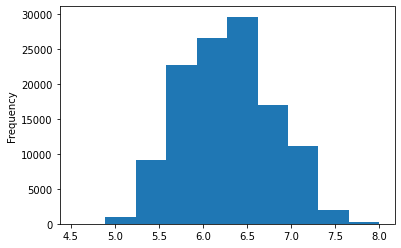

In [ ]:
combustivel_gasolina['Valor'].plot(kind='hist')
pyplot.show()

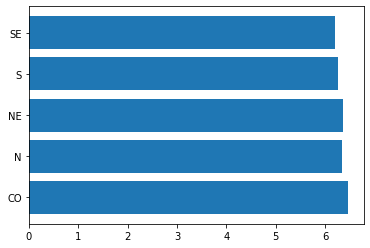

In [ ]:
# MEDIA DA GASOLINA POR REGIÃO

gasolina_regiao = combustivel_gasolina.groupby('Regiao').mean().reset_index()

pyplot.barh(gasolina_regiao['Regiao'], gasolina_regiao['Valor'])

pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


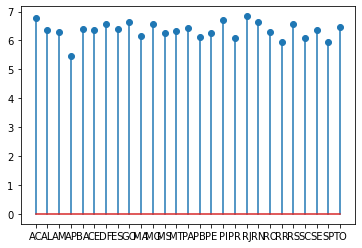

In [ ]:
# MEDIA DA GASOLINA POR ESTADO

gasolina_estado = combustivel_gasolina.groupby('UF').mean().reset_index()

pyplot.stem(gasolina_estado['UF'], gasolina_estado['Valor'])

pyplot.show()

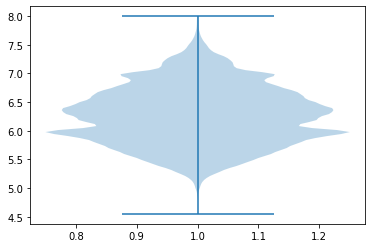

In [ ]:
x = combustivel_gasolina['Valor']

pyplot.violinplot(x)

pyplot.show()

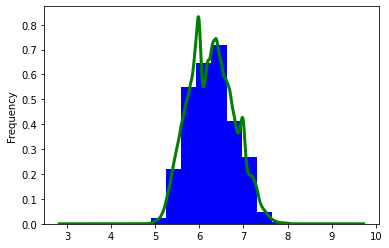

In [ ]:
combustivel_gasolina['Valor'].plot(kind='density', lw=3, color = "green")
combustivel_gasolina['Valor'].plot(kind='hist', density=True, color = "blue")
pyplot.show()

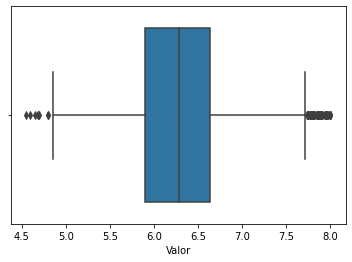

In [ ]:
sns.boxplot(x=combustivel_gasolina["Valor"])

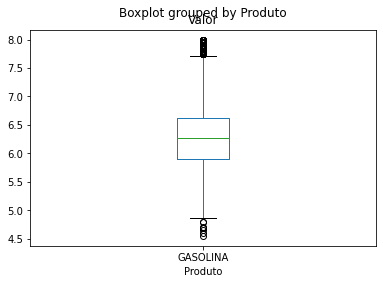

In [ ]:
combustivel_gasolina.boxplot(by ='Produto', column =['Valor'], grid = False)

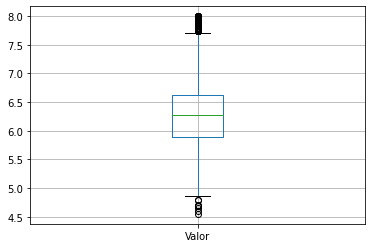

In [ ]:
combustivel_gasolina.boxplot(column =['Valor'])

# **Plotagem Etanol**

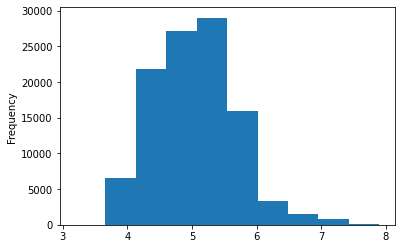

In [ ]:
combustivel_etanol['Valor'].plot(kind='hist')
pyplot.show()

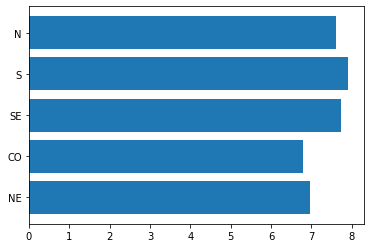

In [ ]:
# MEDIA DA ETANOL POR REGIÃO

etanol_regiao = combustivel_etanol.groupby('Regiao').mean().reset_index()

pyplot.barh(combustivel_etanol['Regiao'], combustivel_etanol['Valor'])

pyplot.show()

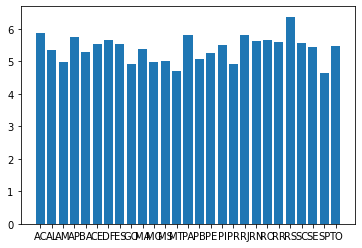

In [ ]:
# MEDIA DO ETANOL POR ESTADO

etanol_estado = combustivel_etanol.groupby('UF').mean().reset_index()

pyplot.bar(etanol_estado['UF'], etanol_estado['Valor'])

pyplot.show()

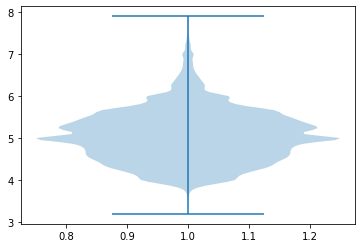

In [ ]:
x = combustivel_etanol['Valor']

pyplot.violinplot(x)

pyplot.show()

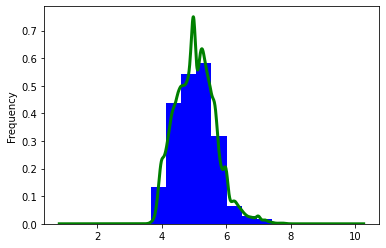

In [ ]:
combustivel_etanol['Valor'].plot(kind='density', lw=3, color = "green")
combustivel_etanol['Valor'].plot(kind='hist', density=True, color = "blue")
pyplot.show()

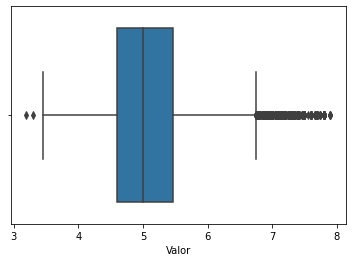

In [ ]:
sns.boxplot(x=combustivel_etanol["Valor"])

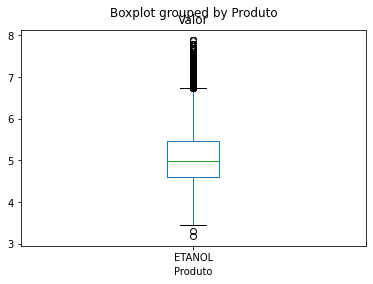

In [ ]:
combustivel_etanol.boxplot(by ='Produto', column =['Valor'], grid = False)

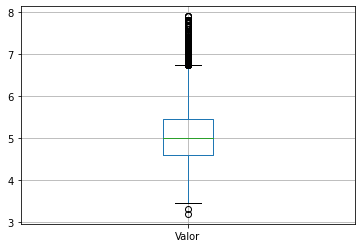

In [ ]:
combustivel_etanol.boxplot(column =['Valor'])